In [2]:
import pandas as pd

In [3]:
def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        keywords = ["US", "U.S", "USA", "United States"]
        mask = chunk.quotation.apply(lambda x: any(word in x for word in keywords))
        US_data = chunk[mask]
        return US_data


In [4]:
year = ["2016","2017","2018","2019","2020"]
for i in year : 
    with pd.read_json('../ADA/Data/quotes-'+i+'.json.bz2', lines=True, compression='bz2', chunksize=1000000) as df_reader:
        list_ = []
        for chunk in df_reader:
            us_data = process_chunk(chunk)
            list_.append(us_data)
    print("Done with " + i )
    frame = pd.concat(list_, ignore_index=True)
    frame.to_csv("Output/us_data_"+i+".csv")



Processing chunk with 1000000 rows
Processing chunk with 1000000 rows
Processing chunk with 1000000 rows
Processing chunk with 1000000 rows
Processing chunk with 1000000 rows
Processing chunk with 244449 rows


In [7]:
len(frame)

frame.to_csv("Output/us_data_2020.csv")


In [8]:
speaker_df = pd.read_parquet("Data/speaker_attributes.parquet")
speaker_df.head()


,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,Q207,George W. Bush,"[Q327959, Q464075, Q3586276, Q4450587]",item,"[Q329646, Q682443, Q33203]"
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,Q297,Diego Velázquez,None,item,None


In [9]:
drop_mask = frame[frame.speaker == "None"].index
frame = frame.drop(drop_mask)
print("{} quotes are removed".format(len(drop_mask)))

26399 quotes are removed


In [10]:
frame["speaker_id"] = frame.qids.map(lambda x: x[0])
frame.head()

speaker_df = speaker_df[['id', 'nationality']]

US_merged = pd.merge(frame, speaker_df, left_on=['speaker_id'], right_on=['id'], how='inner')
print("Before : {}, After : {}".format(len(frame), len(US_merged)))
US_merged.head()


Before : 43435, After : 43133


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_id,id,nationality
0,2020-03-19-002801,All immigration to the US should be halted due...,Laura Ingraham,[Q266863],2020-03-19 19:42:07,2,"[[Laura Ingraham, 0.7681], [None, 0.2254], [Me...",[https://www.lifezette.com/2020/03/laura-ingra...,E,Q266863,Q266863,[Q30]
1,2020-01-11-014107,"I don't know. Maybe we should take it, but we ...",Laura Ingraham,[Q266863],2020-01-11 19:41:05,1,"[[Laura Ingraham, 0.4399], [None, 0.3467], [Do...",[http://feeds.inquisitr.com/~r/google/yDYq/~3/...,E,Q266863,Q266863,[Q30]
2,2020-02-13-002523,"a U.S. national security official, who is advi...",Laura Ingraham,[Q266863],2020-02-13 21:40:34,1,"[[Laura Ingraham, 0.8666], [None, 0.1116], [Tu...",[http://www.salon.com/2020/02/13/trump-tells-k...,E,Q266863,Q266863,[Q30]
3,2020-01-10-064998,Sanctuary cities in the United States on immig...,Laura Ingraham,[Q266863],2020-01-10 00:00:00,1,"[[Laura Ingraham, 0.8294], [None, 0.1409], [Ra...",[https://www.foxnews.com/media/second-amendmen...,E,Q266863,Q266863,[Q30]
4,2020-03-17-010852,China is cofounder of the WHO and it provides ...,Laura Ingraham,[Q266863],2020-03-17 00:00:00,1,"[[Laura Ingraham, 0.8685], [None, 0.1315]]",[https://www.foxnews.com/media/laura-ingraham-...,E,Q266863,Q266863,[Q30]


In [11]:

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kirsch\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
sia = SentimentIntensityAnalyzer()
US_merged["sentiment"] = US_merged.quotation.apply(lambda x: sia.polarity_scores(x)["compound"])
US_merged.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_id,id,nationality,sentiment
0,2020-03-19-002801,All immigration to the US should be halted due...,Laura Ingraham,[Q266863],2020-03-19 19:42:07,2,"[[Laura Ingraham, 0.7681], [None, 0.2254], [Me...",[https://www.lifezette.com/2020/03/laura-ingra...,E,Q266863,Q266863,[Q30],-0.4404
1,2020-01-11-014107,"I don't know. Maybe we should take it, but we ...",Laura Ingraham,[Q266863],2020-01-11 19:41:05,1,"[[Laura Ingraham, 0.4399], [None, 0.3467], [Do...",[http://feeds.inquisitr.com/~r/google/yDYq/~3/...,E,Q266863,Q266863,[Q30],0.5719
2,2020-02-13-002523,"a U.S. national security official, who is advi...",Laura Ingraham,[Q266863],2020-02-13 21:40:34,1,"[[Laura Ingraham, 0.8666], [None, 0.1116], [Tu...",[http://www.salon.com/2020/02/13/trump-tells-k...,E,Q266863,Q266863,[Q30],0.6597
3,2020-01-10-064998,Sanctuary cities in the United States on immig...,Laura Ingraham,[Q266863],2020-01-10 00:00:00,1,"[[Laura Ingraham, 0.8294], [None, 0.1409], [Ra...",[https://www.foxnews.com/media/second-amendmen...,E,Q266863,Q266863,[Q30],0.4215
4,2020-03-17-010852,China is cofounder of the WHO and it provides ...,Laura Ingraham,[Q266863],2020-03-17 00:00:00,1,"[[Laura Ingraham, 0.8685], [None, 0.1315]]",[https://www.foxnews.com/media/laura-ingraham-...,E,Q266863,Q266863,[Q30],0.2263


In [13]:
unique_countries = US_merged.nationality.explode().unique()


In [14]:
pip install SPARQLWrapper


In [15]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """#List of present-day countries and capital(s)
SELECT DISTINCT ?country ?countryLabel
WHERE
{
  ?country wdt:P31 wd:Q3624078 .

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}
ORDER BY ?countryLabel"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

country_dict = {}
for result in results["results"]["bindings"]:
    country_id = result["country"]['value'].split('/')[-1]
    country_dict[country_id] = result["countryLabel"]['value']
country_dict

{'Q889': 'Afghanistan',
 'Q222': 'Albania',
 'Q262': 'Algeria',
 'Q228': 'Andorra',
 'Q916': 'Angola',
 'Q781': 'Antigua and Barbuda',
 'Q414': 'Argentina',
 'Q399': 'Armenia',
 'Q408': 'Australia',
 'Q40': 'Austria',
 'Q227': 'Azerbaijan',
 'Q398': 'Bahrain',
 'Q902': 'Bangladesh',
 'Q244': 'Barbados',
 'Q184': 'Belarus',
 'Q31': 'Belgium',
 'Q242': 'Belize',
 'Q962': 'Benin',
 'Q917': 'Bhutan',
 'Q750': 'Bolivia',
 'Q225': 'Bosnia and Herzegovina',
 'Q963': 'Botswana',
 'Q155': 'Brazil',
 'Q921': 'Brunei',
 'Q219': 'Bulgaria',
 'Q965': 'Burkina Faso',
 'Q967': 'Burundi',
 'Q424': 'Cambodia',
 'Q1009': 'Cameroon',
 'Q16': 'Canada',
 'Q1011': 'Cape Verde',
 'Q929': 'Central African Republic',
 'Q657': 'Chad',
 'Q298': 'Chile',
 'Q739': 'Colombia',
 'Q970': 'Comoros',
 'Q800': 'Costa Rica',
 'Q224': 'Croatia',
 'Q204920': 'Crown of Aragon',
 'Q241': 'Cuba',
 'Q229': 'Cyprus',
 'Q213': 'Czech Republic',
 'Q1008': "Côte d'Ivoire",
 'Q756617': 'Danish Realm',
 'Q974': 'Democratic Republic 

In [16]:
US_with_nation = US_merged.explode('nationality')
US_with_nation.nationality = US_with_nation.nationality.map(country_dict)
US_with_nation.sample(n=20,random_state=711)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_id,id,nationality,sentiment
11473,2020-02-06-078195,Russian intelligence agencies are making a ser...,Dianne Feinstein,[Q230733],2020-02-06 22:41:19,1,"[[Dianne Feinstein, 0.3307], [Adam Schiff, 0.3...",[https://www.motherjones.com/politics/2020/02/...,E,Q230733,Q230733,United States of America,0.4215
13636,2020-02-06-050849,India's leadership and Prime Minister vision h...,Nisha Biswal,[Q14545676],2020-02-06 09:42:12,1,"[[Nisha Biswal, 0.7777], [Rajnath Singh, 0.113...",[http://indiatoday.intoday.in/india/story/indo...,E,Q14545676,Q14545676,India,0.6705
10491,2020-02-06-064907,Maryland Gov. Larry Hogan on Tuesday urged the...,Larry Hogan,"[Q1119051, Q16731303]",2020-02-06 19:01:08,1,"[[Larry Hogan, 0.3876], [Governor Schwarzenegg...",[https://forums.somd.com/threads/hearing-alert...,E,Q1119051,Q1119051,Austria,0.8805
5652,2020-03-23-002884,also explained his plan to propel the relation...,Kim Jong-Un,"[Q10855883, Q56226]",2020-03-23 16:12:00,1,"[[Kim Jong-Un, 0.4526], [President Donald Trum...",[https://www.worldtribune.com/special-and-firm...,E,Q10855883,Q10855883,NaN,-0.1531
10939,2020-02-27-033668,"If you are with the NRA, your time here in Was...",Chris Murphy,"[Q1077594, Q20022484, Q2964809, Q5107535, Q510...",2020-02-27 00:00:00,1,"[[Chris Murphy, 0.9019], [None, 0.0648], [Mitc...",[https://www.wshu.org/post/1-year-after-house-...,E,Q1077594,Q1077594,United States of America,0.5719
1159,2020-02-28-000334,... The new role will put Ambassador Debbie Bi...,Donald Trump,"[Q22686, Q27947481]",2020-02-28 15:18:01,1,"[[Donald Trump, 0.6225], [None, 0.3775]]",[http://feeds.kff.org/~r/kff/kdghpr/~3/Nzi5fGB...,E,Q22686,Q22686,United States of America,0.0000
23877,2020-01-24-071316,So the world that Mike Pompeo is overseeing he...,Rachel Maddow,[Q555],2020-01-24 00:00:00,1,"[[Rachel Maddow, 0.9306], [None, 0.065], [Davi...",[https://www.rawstory.com/2020/01/maddow-break...,E,Q555,Q555,United States of America,-0.8674
31544,2020-03-07-031832,The thing is after the United States and Argen...,Carmelo Ezpeleta,[Q13397120],2020-03-07 10:16:42,1,"[[Carmelo Ezpeleta, 0.8194], [None, 0.1806]]",[http://www.crash.net/motogp/news/937122/1/aus...,E,Q13397120,Q13397120,Spain,0.0534
17900,2020-01-21-090014,Tremendous wealth is pouring into areas that f...,Liu He,"[Q45357854, Q45443721, Q45451682, Q45504223, Q...",2020-01-21 00:00:00,3,"[[Liu He, 0.9234], [None, 0.071], [President D...",[https://www.businessinsider.com/trump-davos-r...,E,Q45357854,Q45357854,NaN,0.7717
23089,2020-04-07-055241,They say U.S.A. 100 percent no fight. Okay. We...,Khabib Nurmagomedov,[Q3526023],2020-04-07 18:51:11,1,"[[Khabib Nurmagomedov, 0.9011], [None, 0.0831]...",[https://www.mmaweekly.com/dana-white-absolves...,E,Q3526023,Q3526023,NaN,-0.6647


<AxesSubplot:title={'center':'Number of quotes'}, xlabel='nationality'>

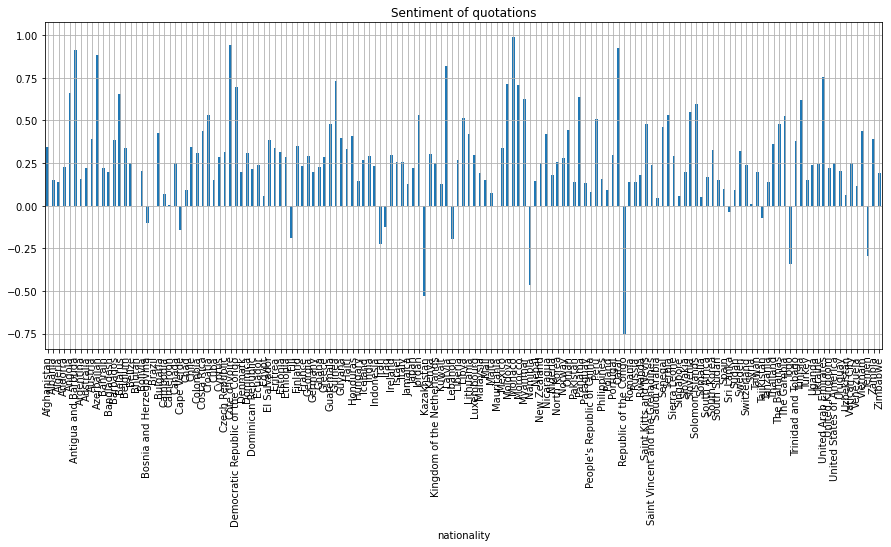

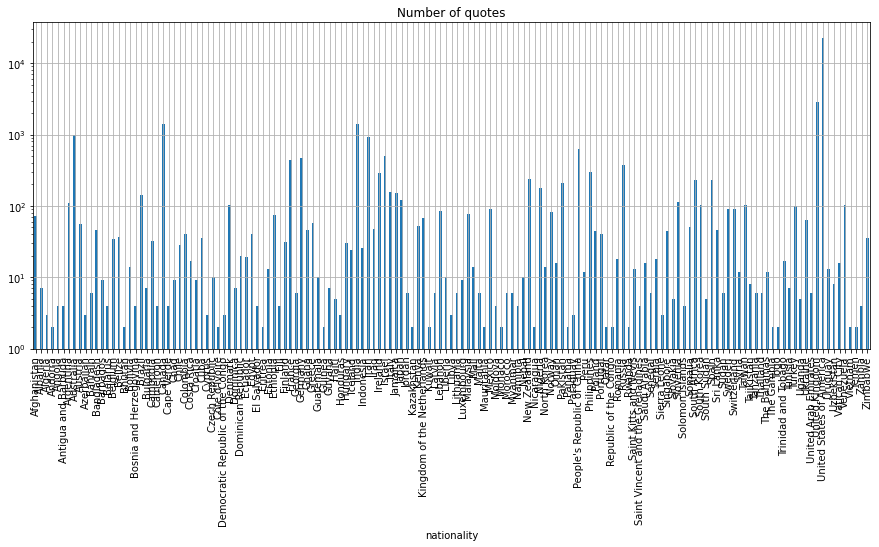

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.title("Sentiment of quotations")
US_with_nation.groupby("nationality")["sentiment"].mean().plot.bar(grid=True)

plt.figure(figsize=(15,6))
plt.title("Number of quotes")
US_with_nation.groupby("nationality")["sentiment"].count().plot.bar(grid=True, log=True)